In [1]:
import pandas as pd
from __future__ import division
dataset = pd.read_csv("C:\Users\Rajiv2806\Documents\Resumes\Inkredo Assesement\events_log.csv")
dataset.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [15]:
import datetime

dataset['time_formatted'] = dataset.timestamp.astype(str)

for i in range(len(dataset)):
    dataset.at[i,'Day'] = dataset.time_formatted.loc[i][7:9]
    dataset.at[i,'Datetime'] = datetime.datetime.strptime(str(int(dataset.timestamp[i])),'%Y%m%d%H%M%S')
    
dataset.head(2)

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,time_formatted,Day,Datetime
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,2.01603011038e+13,01,2016-03-01 10:38:42
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,2.01603070052e+13,07,2016-03-07 00:52:26
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,2.01603021453e+13,02,2016-03-02 14:53:05
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,2.01603022227e+13,02,2016-03-02 22:27:01
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,2.0160302095e+13,02,2016-03-02 09:50:23


In [41]:
uniq_sessions = list(pd.unique(dataset.session_id.loc[0:10000])) #Needs to be changed for overall dataset

Q4_df = pd.DataFrame()

for i in uniq_sessions[0:100]:  #Needs to be changed for overall dataset
    Q4_df.at[i,'Sessionid'] = i
    Q4_df.at[i,'Max_time'] = max(dataset[dataset.session_id == i]['Datetime'])
    Q4_df.at[i,'Mim_time'] = min(dataset[dataset.session_id == i]['Datetime'])
    Q4_df.at[i,'n_results'] = max(dataset[dataset.session_id == i]['n_results'])
        
Q4_df = Q4_df[pd.notnull(Q4_df.n_results)]        
for i in list(Q4_df.index):
    Q4_df.at[i,'timediff'] = (Q4_df.Max_time[i] - Q4_df.Mim_time[i]).seconds

Q4_df.head()

,Sessionid,Max_time,Mim_time,n_results,timediff
78245c2c3fba013a,78245c2c3fba013a,2016-03-01 10:39:26,2016-03-01 10:38:42,5.0,44.0
c559c3be98dca8a4,c559c3be98dca8a4,2016-03-07 00:52:41,2016-03-07 00:45:23,20.0,438.0
485eabe5374f09e4,485eabe5374f09e4,2016-03-02 01:28:45,2016-03-02 01:28:45,15.0,0.0
9822d8a8dc66a02b,9822d8a8dc66a02b,2016-03-07 14:14:26,2016-03-07 14:06:16,20.0,490.0
58ebf0bc66ff11a6,58ebf0bc66ff11a6,2016-03-05 04:18:48,2016-03-05 04:17:50,20.0,58.0


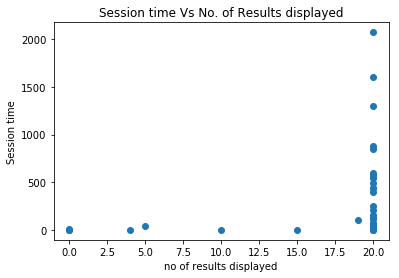

In [43]:
import matplotlib.pyplot as plt
plt.scatter(Q4_df.n_results,Q4_df.timediff)
plt.xlabel("no of results displayed")
plt.ylabel("Session time")
plt.title("Session time Vs No. of Results displayed")
plt.show()